#### Se pretende hacer un análisis preliminar del movimiento de los taxis en la ciudad de Nueva York

#### Se espera que a estos datos ya procesados, podamos cruzarlos con otros datos, como los ofrecidos por viajes compartidos, calidad del aire, contaminación sonora y correlaciones climáticas, por ejemplo.

#### Generar un reporte y análisis significativos de la(s) línea(s) de investigación escogidas: El análisis debe contemplar las relaciones entre variables y concluir, si es que existe, una relación entre estas, y los posibles factores que causan dicha relación en la realidad.

##### Racconto de observaciones mías: 
##### Segun lo que voy viendo: Van a servir los datos de disponibilidad de combustible (dataset1), pero no el rendimiento porque se refiere a buses solamente, por tipo de energia en cada estación (con dataset2) aunque en nueva york tenemos solo GNC y Eléctrico segun este dataset, eficiencia de cada modelo (dataset 3), el modelo y el precio en euros, versus eficiencia y cantidad de asientos (dataset4), Rapid Charge es un atributo que puede ser útil. El Dataset5 tiene los ID de los vehiculos, sus fabricantes y los còdigos de combustibles nomenclados. Por otro lado, tiene "electric Only Range", que nos dice solo para los que son sólo eléctricos. El dataset 6 es una tabla maestra para locaciones, distritos y tipo de taxis segun zonas.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset1 = pd.read_csv('./Archivos y links/Datasets/Alternative_Fuel_Vehicles_US.csv')
dataset2 = pd.read_csv('./Archivos y links/Datasets/Electric and Alternative Fuel Charging Stations.csv')
Dataset3 = pd.read_csv('./Archivos y links/Datasets/ElectricCarData_Clean.csv')
Dataset4 = pd.read_csv('./Archivos y links/Datasets/ElectricCarData_Norm.csv')
Dataset5 = pd.read_csv('./Archivos y links/Datasets/Light Duty Vehicles.csv')
Dataset6 = pd.read_csv('./Archivos y links/Datasets/taxi+_zone_lookup.csv')
Dataset7 = pd.read_csv('./Archivos y links/Datasets/Vehicle Fuel Economy Data.csv')



C:\Users\Agustin\AppData\Local\Temp\ipykernel_2144\2600664206.py:2: DtypeWarning: Columns (6,16,20,31,33,36,39,40,41,43,46,52,53,55,57,58,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset2 = pd.read_csv('./Archivos y links/Datasets/Electric and Alternative Fuel Charging Stations.csv')
C:\Users\Agustin\AppData\Local\Temp\ipykernel_2144\2600664206.py:7: DtypeWarning: Columns (73,75) have mixed types. Specify dtype option on import or set low_memory=False.
  Dataset7 = pd.read_csv('./Archivos y links/Datasets/Vehicle Fuel Economy Data.csv')


In [ ]:
# para ajustar la configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [30]:
print(dataset1[['Fuel', 'All-Electric Range']])

                             Fuel  All-Electric Range
0                 Hybrid Electric                 NaN
1                 Hybrid Electric                 NaN
2                 Hybrid Electric                 NaN
3                 Hybrid Electric                 NaN
4                 Hybrid Electric                 NaN
..                            ...                 ...
877  CNG - Compressed Natural Gas                 NaN
878                      Electric                 NaN
879                      Electric                 NaN
880                      Electric                 NaN
881                      Electric                 NaN

[882 rows x 2 columns]


In [31]:
nan_count = dataset1['All-Electric Range'].isna().sum()
print(nan_count)

660


En All electric Range tenemos 600 nulos, de 882 datos. Quizá es no nulo cuando Fuel es eléctrico y no en los otros casos. 

In [34]:
unique_values = dataset1['All-Electric Range'].unique()
print(unique_values)

[ nan  26. 238. 222. 208. 181. 218. 212. 185. 241.  23.  21.  20.  19.
  17. 301. 282. 270. 227. 324. 305. 315.  31. 247. 259.  32.   8.   9.
  37. 230. 320. 300. 224. 312. 277. 260. 314. 303. 256. 220.  29. 258.
  33.  22. 274. 232. 310. 239.  28. 471. 451. 520. 481. 516. 469. 100.
 350. 340.  18. 114.  24. 149. 226. 215. 249.  15. 199. 200. 225. 204.
 201. 202. 316. 353. 272. 405. 396. 348. 333. 311. 279. 330. 244.  25.
  42. 251. 245. 275. 262.  40.  38. 223.  36. 153. 126. 211.  48. 170.
 234.  59.  61. 110. 233.  52. 263. 387. 371. 341. 326. 250. 240.]


Aclaración: La autonomía totalmente eléctrica (AER) es la autonomía máxima de conducción de un vehículo eléctrico que utiliza solo la energía de su paquete de baterías de a bordo para atravesar un ciclo de conducción determinado. En el caso de un vehículo eléctrico de batería (BEV), significa la autonomía máxima por recarga, normalmente entre 150 y 400 millas. Para un vehículo eléctrico híbrido enchufable (PHEV), significa la autonomía máxima en modo de agotamiento de carga, normalmente entre 20 y 40 millas. Los PHEV pueden viajar considerablemente más lejos en modo de mantenimiento de carga que utiliza tanto la combustión de combustible como el paquete de baterías de a bordo como un vehículo eléctrico híbrido (HEV) convencional.

FUEL nos permite saber cuál combustible usa

PHEV se refiere a un "plug-in electric vehicle" (un auto enchufable).

In [33]:
unique_values = dataset1['Fuel'].unique()
print(unique_values)

['Hybrid Electric' 'Plug-in Hybrid Electric' 'Electric' 'Biodiesel (B20)'
 'Ethanol (E85)' 'Hydrogen Fuel Cell' 'CNG - Bi-fuel'
 'CNG - Compressed Natural Gas' 'Propane - Bi-fuel' 'Propane'
 'LNG - Liquified Natural Gas|CNG - Compressed Natural Gas'
 'CNG - Compressed Natural Gas|LNG - Liquified Natural Gas'
 'Propane|CNG - Compressed Natural Gas'
 'CNG - Compressed Natural Gas|Plug-in Hybrid Electric'
 'Diesel/Hybrid Electric'
 'Propane - Bi-fuel|CNG - Bi-fuel|Propane|CNG - Compressed Natural Gas|Ethanol (E85)'
 'Propane - Bi-fuel|Propane|CNG - Bi-fuel|Ethanol (E85)|CNG - Compressed Natural Gas'
 'CNG - Compressed Natural Gas|Propane - Bi-fuel|E85/Hybrid Electric|CNG - Bi-fuel|Propane'
 'CNG - Bi-fuel|Ethanol (E85)|CNG - Compressed Natural Gas|Propane|Propane - Bi-fuel'
 'Propane - Bi-fuel|Propane|CNG - Compressed Natural Gas|CNG - Bi-fuel'
 'CNG - Compressed Natural Gas|Propane'
 'CNG - Compressed Natural Gas|Propane - Bi-fuel']


In [37]:
value_counts_Fuel = dataset1['Fuel'].value_counts()
print(value_counts_Fuel)

Fuel
Hybrid Electric                                                                             284
Electric                                                                                    246
Plug-in Hybrid Electric                                                                      95
Biodiesel (B20)                                                                              68
CNG - Compressed Natural Gas                                                                 44
Ethanol (E85)                                                                                43
CNG - Compressed Natural Gas|LNG - Liquified Natural Gas                                     22
Diesel/Hybrid Electric                                                                       17
LNG - Liquified Natural Gas|CNG - Compressed Natural Gas                                     15
Hydrogen Fuel Cell                                                                           14
Propane                            

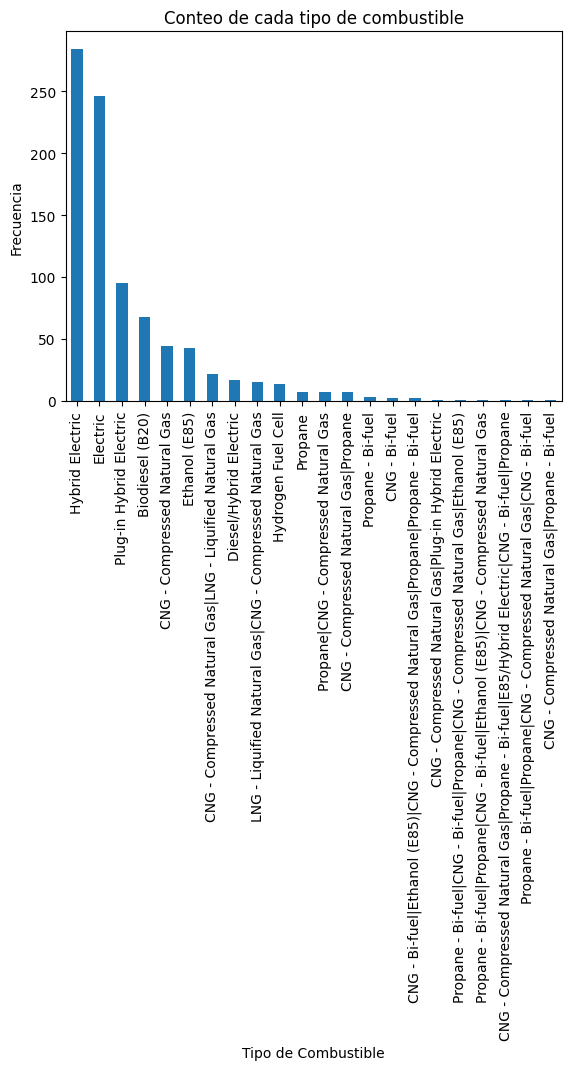

In [38]:
value_counts_Fuel.plot(kind='bar')
plt.title('Conteo de cada tipo de combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Frecuencia')
plt.show()

In [39]:
#Hacer Horizontal

In [49]:
print(dataset1[['Alternative Fuel Economy City', 'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined']])

     Alternative Fuel Economy City  Alternative Fuel Economy Highway  \
0                              NaN                               NaN   
1                              NaN                               NaN   
2                              NaN                               NaN   
3                              NaN                               NaN   
4                              NaN                               NaN   
..                             ...                               ...   
877                            NaN                               NaN   
878                            NaN                               NaN   
879                            NaN                               NaN   
880                            NaN                               NaN   
881                            NaN                               NaN   

     Alternative Fuel Economy Combined  
0                                  NaN  
1                                  NaN  
2           

In [51]:
#dataset1['Alternative Fuel Economy City'].unique()
#dataset1['Alternative Fuel Economy Highway'].unique()
dataset1['Alternative Fuel Economy Combined'].unique()

array([ nan,  70.,  82.,  78.,  73.,  63.,  77.,  75.,  65.,  95.,  61.,
        46.,  67.,  64.,  62.,  56., 109.,  99.,  96.,  80.,  86.,  83.,
        50., 115., 120.,  12.,  11.,  44.,  51., 105.,  13.,  16.,  14.,
        15.,  68.,  66.,  93.,  98.,  91.,  84., 103., 101.,  97.,  19.,
        18., 110., 114., 119.,  57.,  76.,  49., 117., 112.,  79.,  42.,
       116., 111., 125., 131., 121.,  92.,  74., 108., 104.,  89., 107.,
        52.,  48.,  72.,  69., 113., 132., 102., 123., 122., 129., 133.,
        94.,  87.,  85.,  55.,  53., 100.,  60., 118.,  90.,  58., 134.,
       142.])

In [52]:
Alternative_data = dataset1[['Alternative Fuel Economy City', 'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined']]

In [53]:
Alternative_data.isna()

,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined
0,True,True,True
1,True,True,True
2,True,True,True
3,True,True,True
4,True,True,True
...,...,...,...
877,True,True,True
878,True,True,True
879,True,True,True
880,True,True,True


El Alternativa_data sirve para ver como sería eliminar los nullos sin afectar realmente los datos originales, ya que son nulos porque no son autos que usen energía alternativa y no porque estén mal cargados.

In [54]:
Alternative_data.dropna()

,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined
16,81.0,83.0,82.0
17,78.0,77.0,78.0
18,72.0,75.0,73.0
19,62.0,64.0,63.0
20,76.0,78.0,77.0
...,...,...,...
584,102.0,90.0,97.0
585,107.0,91.0,99.0
586,104.0,89.0,97.0
587,98.0,88.0,93.0


El consumo de combustible de un automóvil se relaciona con la distancia recorrida por el vehículo y la cantidad de combustible consumido. El consumo se puede expresar en términos del volumen de combustible necesario para recorrer una distancia o la distancia recorrida por unidad de volumen de combustible consumido.

https://en.wikipedia.org/wiki/Fuel_economy_in_automobiles

En el dataset de "Alternative_Fuel_Vehicles_US" tenemos, además, este medidor FUEL ECONOMY pero con métodos convencionales (Conventional Fuel Economy City/Highway y Combined). 
##### Eso permitiría hacer una comparación de rendimientos entre los dos métodos de combustible.  aunque se refiera a buses solamente


Como el trabajo se centra en automoviles, con el campo Number of Passengers, voy a ver cómo ayudaría a filtrar. 

In [4]:
dataset1['Number of Passengers'].unique()

array([nan, '84', '30', '25', '83', '78', '77', 'Max 57', '16', '41',
       '52', '49', '55', '22', '32', '37', '42', '96', '110', '24',
       '16 + 1 wheelchair', 'Max 25', '35', '43', '.', '31', '33', '29',
       '47', 'Up to 21', '90', '21 + 2 wheelchair', '40 + 2 wheelchair',
       'Up to 99', '40', '48', 'Max 42', '45', 'Max 77', '57', '54', '56',
       '62', '61', 'Up to 22', '23', '47 or 8 wheelchairs', '81', '36-49',
       'Up to 34', '15-18', '17', 'Up to 56'], dtype=object)

Son todos buses (colectivos)

Voy a analisar el dataset 2 (Electric and Alternative Fuel Charging Stations.csv)

In [4]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70406 entries, 0 to 70405
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    70406 non-null  object 
 1   Station Name                      70406 non-null  object 
 2   Street Address                    70405 non-null  object 
 3   Intersection Directions           4492 non-null   object 
 4   City                              70406 non-null  object 
 5   State                             70406 non-null  object 
 6   ZIP                               70405 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     65204 non-null  object 
 9   Status Code                       70406 non-null  object 
 10  Expected Date                     1218 non-null   object 
 11  Groups With Access Code           70406 non-null  object 
 12  Acce

In [18]:
list(dataset2.columns)

['Fuel Type Code',
 'Station Name',
 'Street Address',
 'Intersection Directions',
 'City',
 'State',
 'ZIP',
 'Plus4',
 'Station Phone',
 'Status Code',
 'Expected Date',
 'Groups With Access Code',
 'Access Days Time',
 'Cards Accepted',
 'BD Blends',
 'NG Fill Type Code',
 'NG PSI',
 'EV Level1 EVSE Num',
 'EV Level2 EVSE Num',
 'EV DC Fast Count',
 'EV Other Info',
 'EV Network',
 'EV Network Web',
 'Geocode Status',
 'Latitude',
 'Longitude',
 'Date Last Confirmed',
 'ID',
 'Updated At',
 'Owner Type Code',
 'Federal Agency ID',
 'Federal Agency Name',
 'Open Date',
 'Hydrogen Status Link',
 'NG Vehicle Class',
 'LPG Primary',
 'E85 Blender Pump',
 'EV Connector Types',
 'Country',
 'Intersection Directions (French)',
 'Access Days Time (French)',
 'BD Blends (French)',
 'Groups With Access Code (French)',
 'Hydrogen Is Retail',
 'Access Code',
 'Access Detail Code',
 'Federal Agency Code',
 'Facility Type',
 'CNG Dispenser Num',
 'CNG On-Site Renewable Source',
 'CNG Total Compre

In [11]:
for col in dataset2.columns:
    print(col)

Fuel Type Code
Station Name
Street Address
Intersection Directions
City
State
ZIP
Plus4
Station Phone
Status Code
Expected Date
Groups With Access Code
Access Days Time
Cards Accepted
BD Blends
NG Fill Type Code
NG PSI
EV Level1 EVSE Num
EV Level2 EVSE Num
EV DC Fast Count
EV Other Info
EV Network
EV Network Web
Geocode Status
Latitude
Longitude
Date Last Confirmed
ID
Updated At
Owner Type Code
Federal Agency ID
Federal Agency Name
Open Date
Hydrogen Status Link
NG Vehicle Class
LPG Primary
E85 Blender Pump
EV Connector Types
Country
Intersection Directions (French)
Access Days Time (French)
BD Blends (French)
Groups With Access Code (French)
Hydrogen Is Retail
Access Code
Access Detail Code
Federal Agency Code
Facility Type
CNG Dispenser Num
CNG On-Site Renewable Source
CNG Total Compression Capacity
CNG Storage Capacity
LNG On-Site Renewable Source
E85 Other Ethanol Blends
EV Pricing
EV Pricing (French)
LPG Nozzle Types
Hydrogen Pressures
Hydrogen Standards
CNG Fill Type Code
CNG PSI

Hay varias que tiene información en francés?
'Intersection Directions (French)', 'Access Days Time (French)', 'BD Blends (French)', 'Groups With Access Code (French)', 'EV Pricing (French)'


In [9]:
dataset2.head(2)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,NaN,Private,NaN,NaN,NaN,B,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-9,32.367916,-86.267021,2022-06-14,17,2022-06-14 16:22:47 UTC,T,NaN,NaN,2010-12-01,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Privé,NaN,private,NaN,NaN,STANDALONE_STATION,NaN,NONE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,NaN,Public - Card key at all times,24 hours daily,Comdata FleetOne FuelMan Voyager Wright_Exp,NaN,Q,3600,NaN,NaN,NaN,NaN,NaN,NaN,200-8,33.745843,-84.398837,2021-08-04,42,2022-02-10 19:42:29 UTC,P,NaN,NaN,1994-07-15,NaN,MD,NaN,NaN,NaN,US,NaN,NaN,NaN,Public - Carte-clé en tout temps,NaN,public,KEY_ALWAYS,NaN,STANDALONE_STATION,1.0,NaN,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,False


In [7]:
dataset2.tail()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
70401,ELEC,SCHLITZ PARK SCHLITZ PARK,1555 N River Center Dr,NaN,Milwaukee,WI,53212,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70402,ELEC,NEXUS EAST STATION 2,720 Airport Blvd,NaN,Austin,TX,78702,NaN,888-758-4389,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70403,ELEC,Raley's,6119 Horseshoe Bar Rd,NaN,Loomis,CA,95650,NaN,877-455-3833,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70404,ELEC,13601 Glenoaks blvd,13601 Glenoaks blvd,NaN,Los Angeles,CA,91342,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70405,ELEC,6723 Van Nuys blvd,6723 Van Nuys Blvd,NaN,Los Angeles,CA,91405,NaN,888-356-8911,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De aquí tendríamos que ver los que son de Nueva York (NY) y dejar solo esos datos.

In [4]:
dataset2_NY = dataset2[dataset2['City']=='New York']

In [7]:
dataset2_NY.shape


(381, 65)

In [12]:
dataset2_NY.tail(1)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,Expected Date,Groups With Access Code,Access Days Time,Cards Accepted,BD Blends,NG Fill Type Code,NG PSI,EV Level1 EVSE Num,EV Level2 EVSE Num,EV DC Fast Count,EV Other Info,EV Network,EV Network Web,Geocode Status,Latitude,Longitude,Date Last Confirmed,ID,Updated At,Owner Type Code,Federal Agency ID,Federal Agency Name,Open Date,Hydrogen Status Link,NG Vehicle Class,LPG Primary,E85 Blender Pump,EV Connector Types,Country,Intersection Directions (French),Access Days Time (French),BD Blends (French),Groups With Access Code (French),Hydrogen Is Retail,Access Code,Access Detail Code,Federal Agency Code,Facility Type,CNG Dispenser Num,CNG On-Site Renewable Source,CNG Total Compression Capacity,CNG Storage Capacity,LNG On-Site Renewable Source,E85 Other Ethanol Blends,EV Pricing,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
70215,ELEC,Delancey & Essex Municipal Parking Garage,107 Essx St,NaN,New York,NY,10002,NaN,866-816-7584,E,NaN,Public - Credit card at all times,24 hours daily,A D Debit M V,NaN,NaN,NaN,NaN,NaN,4.0,NaN,EV Connect,http://evconnect.com/,GPS,40.719319,-73.988197,NaN,224172,2022-07-21 22:42:07 UTC,P,NaN,NaN,2022-07-16,NaN,NaN,NaN,NaN,CHADEMO J1772COMBO,US,NaN,NaN,NaN,Public - Carte de crédit en tout temps,NaN,public,CREDIT_CARD_ALWAYS,NaN,PARKING_GARAGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


Aqui tengo la Latitud y Longitud de las estaciones de serivicio y què tipo de combustibles tiene disponibles (FUEL TYPE CODE)

In [19]:
dataset2_NY[['Station Name', 'Fuel Type Code', 'Street Address', 'Latitude', 'Longitude', 'Access Days Time']].head()

,Station Name,Fuel Type Code,Street Address,Latitude,Longitude,Access Days Time
9,Con Edison - W 29th St Service Center,CNG,281 11th Ave,40.752903,-74.005831,24 hours daily; call 718-204-4100 to arrange f...
10,Con Edison - E 16th St Service Center,CNG,700 E 16th St,40.729175,-73.973310,24 hours daily; call 718-204-4048 to arrange f...
7777,Port Authority Bus Terminal,ELEC,625 8th Ave,40.756177,-73.990558,24 hours daily
9645,United Parcel Service,ELEC,643 W 43rd St,40.762442,-74.000055,NaN
14384,Spectrum,ELEC,401 W 219th St,40.871210,-73.911616,Office business hours; for employee and guest ...


In [18]:
Combustibles_NY = dataset2_NY['Fuel Type Code'].unique()
print(Combustibles_NY)

['CNG' 'ELEC']


En Nueva York tenemos GNC y Eléctrico, solamente!

Cuáles son las tecnologias disponibles, en el dataset que no está limitado a NY?

In [14]:
#distinct fuel type code
unique_values = dataset2['Fuel Type Code'].unique()
print(unique_values)

['CNG' 'E85' 'ELEC' 'LNG' 'LPG' 'BD' 'HY']


E85: Se refiere a una mezcla de etanol (85% etanol y 15% gasolina).

LPG: Significa Gas Licuado de Petróleo (o Propano), utilizado en vehículos que funcionan con propano.

BD: Abreviatura de Biodiésel, un combustible renovable derivado de aceites vegetales o grasas animales.

GNC (Gas Natural Comprimido): Es gas natural almacenado a alta presión y utilizado como combustible para vehículos. Es principalmente metano comprimido.

GNL (Gas Natural Licuado): Es gas natural que se ha enfriado hasta convertirlo en un líquido para facilitar su almacenamiento y transporte. Se utiliza también como combustible para vehículos pesados.

HY (Hidrógeno): Hace referencia a los vehículos que funcionan con hidrógeno como combustible, utilizando celdas de combustible para generar electricidad que impulsa el motor.

ELEC (Eléctrico): Se refiere a los vehículos eléctricos que funcionan completamente con electricidad almacenada en baterías recargables.

In [15]:
value_counts = dataset2['Fuel Type Code'].value_counts()
print(value_counts)

Fuel Type Code
ELEC    60907
E85      4508
LPG      1867
CNG      1631
BD       1218
LNG       158
HY        117
Name: count, dtype: int64


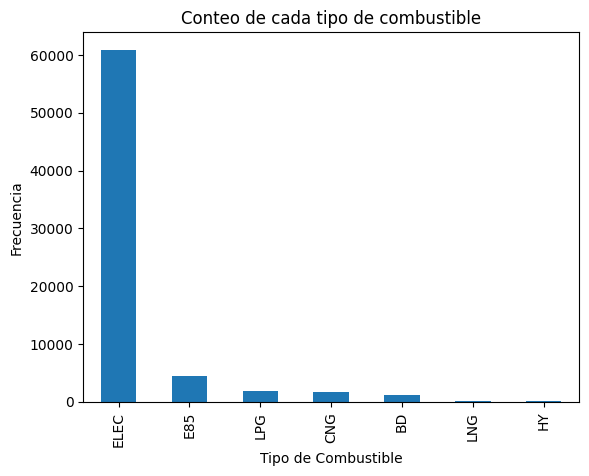

In [17]:
value_counts.plot(kind='bar')
plt.title('Conteo de cada tipo de combustible')
plt.xlabel('Tipo de Combustible')
plt.ylabel('Frecuencia')
plt.show()

Necesito saber a qué fecha o fechas corresponden estos datos totales?

In [24]:
print(dataset2[['Fuel Type Code', 'Expected Date', 'Date Last Confirmed', 'Access Days Time', 'Open Date']])


      Fuel Type Code Expected Date Date Last Confirmed Access Days Time  \
0                CNG           NaN          2022-06-14              NaN   
1                CNG           NaN          2021-08-04   24 hours daily   
2                CNG           NaN          2021-08-04              NaN   
3                CNG           NaN          2022-06-14              NaN   
4                CNG           NaN          2022-06-14   24 hours daily   
...              ...           ...                 ...              ...   
70401           ELEC           NaN          2022-07-25   24 hours daily   
70402           ELEC           NaN          2022-07-25   24 hours daily   
70403           ELEC           NaN          2022-07-25   24 hours daily   
70404           ELEC           NaN          2022-07-25   24 hours daily   
70405           ELEC           NaN          2022-07-25   24 hours daily   

        Open Date  
0      2010-12-01  
1      1994-07-15  
2      1996-12-15  
3      1997-01-01  

debo hacer OPEN DATE where Fuel Type Code == ELEC

In [7]:
open_date_elec = dataset2[dataset2['Fuel Type Code'] == 'ELEC'][['Open Date']]
open_date_elec = open_date_elec.sort_values(by='Open Date')

print(open_date_elec)

        Open Date
158    1995-08-30
165    1996-10-15
170    1997-07-30
175    1997-08-30
174    1997-08-30
...           ...
70164         NaN
70165         NaN
70166         NaN
70167         NaN
70168         NaN

[60907 rows x 1 columns]


"Accses Days Time" me dice la disponibilidad de la estacion (24 horas por ejemplo).

Expected date parece que tiene todo NAN

In [26]:
nan_count = dataset2['Expected Date'].isna().sum()
print(nan_count)

69188


Tienendo en cuenta que tenemos 70405, tenemos casi todos los valores nulos (69188): solo 1217 valores válidos

In [25]:
print(dataset2[['Fuel Type Code', 'Date Last Confirmed', 'Open Date']])

      Fuel Type Code Date Last Confirmed   Open Date
0                CNG          2022-06-14  2010-12-01
1                CNG          2021-08-04  1994-07-15
2                CNG          2021-08-04  1996-12-15
3                CNG          2022-06-14  1997-01-01
4                CNG          2022-06-14  1997-01-01
...              ...                 ...         ...
70401           ELEC          2022-07-25  2022-07-24
70402           ELEC          2022-07-25  2022-07-24
70403           ELEC          2022-07-25  2022-07-25
70404           ELEC          2022-07-25  2022-07-25
70405           ELEC          2022-07-25  2022-07-25

[70406 rows x 3 columns]


"Open Date" me dice cuándo abrió la estación.

"Date last Confirmed" es la ultima fecha de funcionamiento confirmada, parece.

al contar los open date desde 2022 hasta ahora, puedo saber còmo crecieron las estaciones en NY

In [10]:
dataset2_Date = dataset2.copy()

dataset2_Date['Open Date'] = pd.to_datetime(dataset2_Date['Open Date'], errors='coerce')

filtered_data = dataset2_Date[
    (dataset2_Date['Open Date'].dt.year > 2020) &
    (dataset2_Date['Fuel Type Code'] == 'ELEC') &
    (dataset2_Date['City'] == 'New York')
]
total_values = filtered_data.shape[0]
print(total_values)


98


Podrìa ver cuántas hay en otras ciudades para comparar

### En conclusion, en este dataset "Electric and Alternative Fuel Charging Stations" tenemos qué tipo de combustible se dispone en cada estación y cuál es la cantidad actual total usada, con las fechas de apertura histórica (y a veces de cierre) de las mismas.

Esto podría servir para entender la demanda de cada tipo de combustible alternativo a lo largo de los años y su evolución en el consumo por zona. 


Voy a explorar el dataset 3 (ElectricCarData_Clean.csv)

In [14]:
Dataset3.info

<bound method DataFrame.info of            Brand                            Model  AccelSec  TopSpeed_KmH  \
0         Tesla     Model 3 Long Range Dual Motor       4.6           233   
1    Volkswagen                         ID.3 Pure      10.0           160   
2      Polestar                                 2       4.7           210   
3           BMW                              iX3        6.8           180   
4         Honda                                e        9.5           145   
5         Lucid                              Air        2.8           250   
6    Volkswagen                           e-Golf        9.6           150   
7       Peugeot                            e-208        8.1           150   
8         Tesla       Model 3 Standard Range Plus       5.6           225   
9          Audi                        Q4 e-tron        6.3           180   
10     Mercedes                    EQC 400 4MATIC       5.1           180   
11       Nissan                             

Aquí tenemos marcas y modelos de taxis, con valores de eficiencia: Range_Km  Efficiency_WhKm FastCharge_KmH


In [66]:
print(Dataset3[['Range_Km','Efficiency_WhKm','FastCharge_KmH']])

     Range_Km  Efficiency_WhKm FastCharge_KmH
0         450              161            940
1         270              167            250
2         400              181            620
3         360              206            560
4         170              168            190
..        ...              ...            ...
98        330              191            440
99        335              258            540
100       325              194            440
101       375              232            450
102       400              238            480

[103 rows x 3 columns]


Al igual que el consumo de combustible de los vehículos con motor de combustión interna se mide en litros por cada 100 km (L/100 km) en carretera, en ciudad y en combinación, la eficiencia de los vehículos eléctricos se mide por el número de kWh consumidos en 100 km.

Voy a ver el siguiente dataset: 
Dataset4 es "ElectricCarData_Norm.csv"

In [12]:
Dataset4.info

<bound method DataFrame.info of            Brand                            Model     Accel  TopSpeed   Range  \
0         Tesla     Model 3 Long Range Dual Motor   4.6 sec  233 km/h  450 km   
1    Volkswagen                         ID.3 Pure  10.0 sec  160 km/h  270 km   
2      Polestar                                 2   4.7 sec  210 km/h  400 km   
3           BMW                              iX3    6.8 sec  180 km/h  360 km   
4         Honda                                e    9.5 sec  145 km/h  170 km   
5         Lucid                              Air    2.8 sec  250 km/h  610 km   
6    Volkswagen                           e-Golf    9.6 sec  150 km/h  190 km   
7       Peugeot                            e-208    8.1 sec  150 km/h  275 km   
8         Tesla       Model 3 Standard Range Plus   5.6 sec  225 km/h  310 km   
9          Audi                        Q4 e-tron    6.3 sec  180 km/h  400 km   
10     Mercedes                    EQC 400 4MATIC   5.1 sec  180 km/h  370 km

Este es el mismo dataset que el 3, pero con los valores normalizados (y unidades correspondientes incluidas en cada valor de la fila).

In [5]:
Dataset4.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [19]:
value_counts_marca = Dataset4['Brand'].unique().sum()
value_counts_modelo = Dataset4['Model'].unique().sum()

In [24]:
Dataset4['Brand'].unique()

array(['Tesla ', 'Volkswagen ', 'Polestar ', 'BMW ', 'Honda ', 'Lucid ',
       'Peugeot ', 'Audi ', 'Mercedes ', 'Nissan ', 'Hyundai ',
       'Porsche ', 'MG ', 'Mini ', 'Opel ', 'Skoda ', 'Volvo ', 'Kia ',
       'Renault ', 'Mazda ', 'Lexus ', 'CUPRA ', 'SEAT ', 'Lightyear ',
       'Aiways ', 'DS ', 'Citroen ', 'Jaguar ', 'Ford ', 'Byton ',
       'Sono ', 'Smart ', 'Fiat '], dtype=object)

In [29]:
Dataset4['Brand'].nunique()

33

In [28]:
Dataset4['Model'].nunique()

102

Hay 102 modelos posibles y 33 marcas

De esta tabla nos va a servir saber, a la hora de recomendar una inversión al Product Owner: Eficiencia, Rapid Charge, Seats y Price (euros).

Debería poderse ordenar cada auto según su huella de carbono (tipo de combustible y eficiencia, sin dejar de lado la forma de producciócn del combustible)

Por otro lado, Top Speed, Accel y power Train no creo que seam datos relevantes para nosotros, puesto que son taxis para la ciudad y no autos para viajar por autopista o ruta (correcto?) 

Voy a ver qué información relevante tiene el dataset 5 (Light Duty Vehicle)

In [13]:
Dataset5.shape

(3008, 29)

In [4]:
Dataset5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Vehicle ID                          3008 non-null   int64  
 1   Fuel ID                             3008 non-null   int64  
 2   Fuel Configuration ID               2973 non-null   float64
 3   Manufacturer ID                     3008 non-null   int64  
 4   Category ID                         3008 non-null   int64  
 5   Model                               3008 non-null   object 
 6   Model Year                          3008 non-null   int64  
 7   Alternative Fuel Economy City       1595 non-null   float64
 8   Alternative Fuel Economy Highway    1505 non-null   float64
 9   Alternative Fuel Economy Combined   467 non-null    float64
 10  Conventional Fuel Economy City      2044 non-null   float64
 11  Conventional Fuel Economy Highway   2046 no

In [5]:
for col in Dataset5.columns:
    print(col)

Vehicle ID
Fuel ID
Fuel Configuration ID
Manufacturer ID
Category ID
Model
Model Year
Alternative Fuel Economy City
Alternative Fuel Economy Highway
Alternative Fuel Economy Combined
Conventional Fuel Economy City
Conventional Fuel Economy Highway
Conventional Fuel Economy Combined
Transmission Type
Engine Type
Engine Size
Engine Cylinder Count
Engine Description
Manufacturer
Manufacturer URL
Category
Fuel Code
Fuel
Fuel Configuration Name
Electric-Only Range
PHEV Total Range
PHEV Type
Notes
Drivetrain


Aqui tenemos una tabla maestra de vehiculos (pq tiene el ID del vehiculo y 
de categoría, el código (nomenclatura) de cada combustible "Fuel Code" y "Fuel Configutation Name")

In [15]:
Dataset5

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,...,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,...,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,...,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3003,656,3,1.0,225,9,Ram Van B250,1992,NaN,NaN,NaN,...,http://www.dodge.com,Van,CNG,CNG - Compressed Natural Gas,Dedicated,NaN,NaN,NaN,NaN,NaN
3004,660,49,5.0,225,27,Spirit FFV,1992,NaN,NaN,NaN,...,http://www.dodge.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3005,658,49,5.0,219,9,Econoline-Fleet Demo FFV,1992,NaN,NaN,NaN,...,https://www.ford.com,Van,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN
3006,650,49,5.0,215,27,Lumina FFV,1991,NaN,NaN,NaN,...,http://www.chevrolet.com,Sedan/Wagon,M85_GSLN,Methanol,Flexible Fuel,NaN,NaN,NaN,NaN,NaN


In [16]:
Dataset5[['Fuel','Fuel Configuration Name']]

,Fuel,Fuel Configuration Name
0,Hybrid Electric,Hybrid Electric
1,Hybrid Electric,Hybrid Electric
2,Hybrid Electric,Hybrid Electric
3,Hybrid Electric,Hybrid Electric
4,Hybrid Electric,Hybrid Electric
...,...,...
3003,CNG - Compressed Natural Gas,Dedicated
3004,Methanol,Flexible Fuel
3005,Methanol,Flexible Fuel
3006,Methanol,Flexible Fuel


In [17]:
Dataset5['Fuel Configuration Name'].unique()

array(['Hybrid Electric', nan, 'Dedicated', 'Flexible Fuel',
       'Dual/Bi-Fueled', 'Fuel Cell'], dtype=object)

In [18]:
Dataset5['Fuel'].unique()

array(['Hybrid Electric', 'Plug-in Hybrid Electric', 'Electric',
       'Biodiesel (B20)', 'Ethanol (E85)', 'Hydrogen Fuel Cell',
       'Propane - Bi-fuel', 'CNG - Bi-fuel',
       'CNG - Compressed Natural Gas', 'Propane', 'Methanol'],
      dtype=object)

In [31]:
nan1 = Dataset5['Alternative Fuel Economy City'].isna().sum()
nan2 = Dataset5['Alternative Fuel Economy Highway'].isna().sum()
nan3 = Dataset5['Alternative Fuel Economy Combined'].isna().sum()
nan4 = Dataset5['Electric-Only Range'].isna().sum()

In [32]:
print(f"De 3008 filas:")
print(f"en Alternative Fuel Economy tenemos {nan1} datos NAN")
print(f"en Alternative Fuel City tenemos {nan2} datos NAN")
print(f"en Alternative Fuel Combined tenemos {nan3} datos NAN")
print(f"en Electric-Only Range, tenemos {nan4} datos NAN.")

De 3008 filas:
en Alternative Fuel Economy tenemos 1413 datos NAN
en Alternative Fuel City tenemos 1503 datos NAN
en Alternative Fuel Combined tenemos 2541 datos NAN
en Electric-Only Range, tenemos 2634 datos NAN.


In [39]:
ElectricosOnly = Dataset5[['Vehicle ID', 'Fuel', 'Fuel Configuration Name', 'Electric-Only Range']].dropna()

In [40]:
ElectricosOnly.size

1368

In [42]:
ElectricosOnly

,Vehicle ID,Fuel,Fuel Configuration Name,Electric-Only Range
38,13090,Plug-in Hybrid Electric,Hybrid Electric,21.0
39,13067,Plug-in Hybrid Electric,Hybrid Electric,23.0
40,13068,Plug-in Hybrid Electric,Hybrid Electric,20.0
41,13069,Plug-in Hybrid Electric,Hybrid Electric,21.0
42,13070,Plug-in Hybrid Electric,Hybrid Electric,19.0
...,...,...,...,...
1038,12242,Plug-in Hybrid Electric,Hybrid Electric,22.0
1039,12071,Plug-in Hybrid Electric,Hybrid Electric,21.0
1040,12072,Plug-in Hybrid Electric,Hybrid Electric,17.0
1041,12073,Plug-in Hybrid Electric,Hybrid Electric,17.0


El "Electric-Only Range" (o rango eléctrico) es una medida que se refiere a la distancia que un vehículo eléctrico o híbrido enchufable puede recorrer utilizando exclusivamente su motor eléctrico, sin recurrir al motor de combustión interna (si lo tiene). Este valor suele medirse en kilómetros o millas y es clave para determinar cuán eficiente es un vehículo en su modo puramente eléctrico.

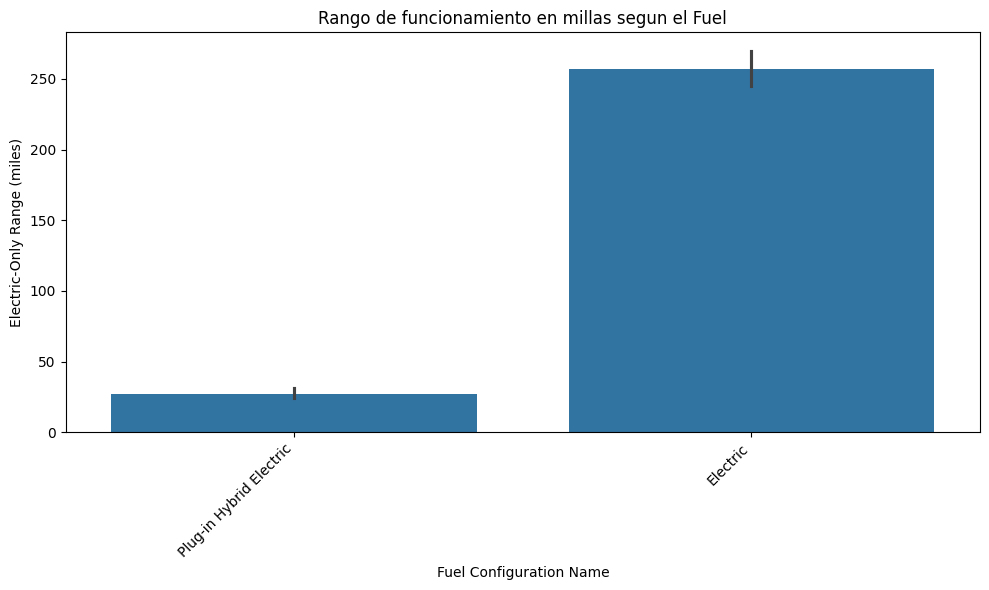

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Fuel', y='Electric-Only Range', data=ElectricosOnly)
plt.xticks(rotation=45, ha='right')

plt.title('Rango de funcionamiento en millas segun el Fuel')
plt.xlabel('Fuel Configuration Name')
plt.ylabel('Electric-Only Range (miles)')


plt.tight_layout() 
plt.show()

En los vehículos 100% eléctricos (BEV - Battery Electric Vehicles), el "Electric-Only Range" representa toda la autonomía del vehículo, ya que solo funcionan con electricidad.
En los vehículos híbridos enchufables (PHEV - Plug-in Hybrid Electric Vehicles), el "Electric-Only Range" es la distancia que pueden recorrer únicamente en modo eléctrico antes de que el motor de combustión interna se active para proporcionar energía adicional.

En los coches eléctricos puros, el "Electric-Only Range" es crucial para evitar la llamada "ansiedad de rango", que es el miedo a quedarse sin batería antes de llegar a una estación de recarga.

Voy a explorar el dataset taxi + zone lookup

In [14]:
for col in Dataset6.columns:
    print(col)

LocationID
Borough
Zone
service_zone


In [5]:
Dataset6.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


Hay 4 zonas, por lo visto: la amarilla, la Boro (taxis verdes), 
 Un "boro taxi"  no puede abordar pasajeros en la zona amarilla (Manhattan, New York City). Exite otro tipo de Taxi, el negro (uber, por ej?) que son por app y cobran segun prefieran.

 https://www.youtube.com/watch?v=ldNyq7kq_-s

In [11]:
Dataset6['Zone'].nunique()

261

261 zonas

In [13]:
Dataset6['Borough'].nunique()

7

7 distritos

In [15]:
Dataset6['service_zone'].nunique()

4

Veré el dataset que sigue, Dataset7=Vehicle Fuel Econony Data.

In [4]:
Dataset7.shape

(46186, 82)

In [7]:
Dataset7.head(2)

,Year,Manufacturer,Model,barrels08,barrelsA08,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,cityUF,co2,co2A,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U,combA08,combA08U,combE,combinedCD,combinedUF,cylinders,displ,drive,engId,eng_dscr,feScore,fuelCost08,fuelCostA08,fuelType,fuelType1,ghgScore,ghgScoreA,highway08,highway08U,highwayA08,highwayA08U,VClass,highwayCD,highwayE,highwayUF,hlv,hpv,id,lv2,lv4,mpgData,phevBlended,pv2,pv4,range,rangeCity,rangeCityA,rangeHwy,rangeHwyA,trany,UCity,UCityA,UHighway,UHighwayA,youSaveSpend,guzzler,trans_dscr,tCharger,sCharger,atvType,fuelType2,rangeA,evMotor,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,2017,BMW,M6 Coupe,17.500588,0.0,0.0,15.0,14.0,0.0,0.0,0.0,0.0,0.0,519.0,-1.0,0.0,519.0,17.0,17.0,0.0,0.0,0.0,0.0,0.0,8.0,4.4,Rear-Wheel Drive,660.0,SIDI,3.0,3850.0,0.0,Premium,Premium Gasoline,3.0,-1.0,22.0,21.0,0.0,0.0,Subcompact Cars,0.0,0.0,0.0,0.0,0.0,37330.0,13.0,0.0,N,False,87.0,0.0,0.0,0.0,0.0,0.0,0.0,Manual 6-spd,17.9989,0.0,30.0000,0.0,-9750.0,G,NaN,T,NaN,NaN,NaN,NaN,NaN,BMX,NaN,0.0,NaN,04-04-2016,09-09-2016,Y,0.0,0.0,0.0
1,2017,BMW,X3 sDrive28i,12.396250,0.0,0.0,21.0,21.0,0.0,0.0,0.0,0.0,0.0,374.0,-1.0,0.0,374.0,24.0,23.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,Rear-Wheel Drive,371.0,SIDI,5.0,2700.0,0.0,Premium,Premium Gasoline,5.0,-1.0,28.0,27.0,0.0,0.0,Small Sport Utility Vehicle 2WD,0.0,0.0,0.0,0.0,0.0,37343.0,0.0,0.0,N,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Automatic (S8),26.7866,0.0,39.2499,0.0,-4000.0,NaN,NaN,T,NaN,NaN,NaN,NaN,NaN,BMX,NaN,0.0,NaN,04-04-2016,22-11-2016,Y,0.0,0.0,0.0


Year:
Manufacturer:
Model:
VClass:
co2:
co2:
city08:
city08U:
createdOn:
UHighway:
fuelType1:
fuelCost08:
youSaveSpend:

barrels08:
Cada barril cuenta con un inversor híbrido de 5.6 kW, una batería de litio-ferrofosfato de 3.55 kWh y una salida de hasta 100 A, y todo listo y preparado para ser conectado a cualquier tipo de paneles solares con una potencia máxima de hasta 6 kW por barril. Unos paneles que el cliente tendrá que adquirir de forma separada si es que no los tiene ya.

Esto permite a los interesados adquirir un barril y conectado a cuatro paneles en un kit básico de 1.24 kW de potencia, seis paneles, 1.8 kW…y así respectivamente hasta llegar al máximo de 20 paneles y 6 kW.

co2TailpipeAGpm:
co2TailpipeGpm:
comb08:
comb08U:

In [11]:
sub_dataset7 = Dataset7[["Year","Manufacturer","Model","VClass","co2","co2","city08","city08U","createdOn","highway08","highway08U","fuelType1","fuelCost08","youSaveSpend","barrels08","co2TailpipeAGpm","co2TailpipeGpm","comb08","comb08U"]]

In [12]:
sub_dataset7.head(2)

,Year,Manufacturer,Model,VClass,co2,co2,city08,city08U,createdOn,highway08,highway08U,fuelType1,fuelCost08,youSaveSpend,barrels08,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U
0,2017,BMW,M6 Coupe,Subcompact Cars,519.0,519.0,15.0,14.0,04-04-2016,22.0,21.0,Premium Gasoline,3850.0,-9750.0,17.500588,0.0,519.0,17.0,17.0
1,2017,BMW,X3 sDrive28i,Small Sport Utility Vehicle 2WD,374.0,374.0,21.0,21.0,04-04-2016,28.0,27.0,Premium Gasoline,2700.0,-4000.0,12.396250,0.0,374.0,24.0,23.0


In [13]:
sub_dataset7["fuelType1"].nunique()

6

In [26]:
sub_dataset7["fuelType1"].unique()

array(['Premium Gasoline', 'Regular Gasoline', 'Diesel', 'Electricity',
       'Midgrade Gasoline', nan, 'Natural Gas'], dtype=object)

In [18]:
sub_dataset7_electricity = sub_dataset7[sub_dataset7["fuelType1"] == "Electricity"]


In [19]:
sub_dataset7_electricity.head()

,Year,Manufacturer,Model,VClass,co2,co2,city08,city08U,createdOn,highway08,highway08U,fuelType1,fuelCost08,youSaveSpend,barrels08,co2TailpipeAGpm,co2TailpipeGpm,comb08,comb08U
20,2016,Tesla,Model S (75 kW-hr battery pack),Large Cars,0.0,0.0,97.0,97.0,04-05-2016,100.0,99.0,Electricity,700.0,6000.0,0.0816,0.0,0.0,98.0,98.0
187,2017,Kia,Soul Electric,Small Station Wagons,0.0,0.0,120.0,119.0,13-09-2016,92.0,92.0,Electricity,650.0,6250.0,0.0768,0.0,0.0,105.0,105.0
239,2017,Hyundai,Ioniq Electric,Midsize Cars,0.0,0.0,150.0,150.0,16-11-2016,122.0,122.0,Electricity,500.0,7000.0,0.0600,0.0,0.0,136.0,136.0
261,2017,Ford,Focus Electric,Compact Cars,0.0,0.0,118.0,118.0,16-12-2016,96.0,95.0,Electricity,650.0,6250.0,0.0744,0.0,0.0,107.0,107.0
268,2017,Tesla,Model S AWD - 60D,Large Cars,0.0,0.0,101.0,101.0,11-01-2017,107.0,106.0,Electricity,650.0,6250.0,0.0768,0.0,0.0,104.0,103.0


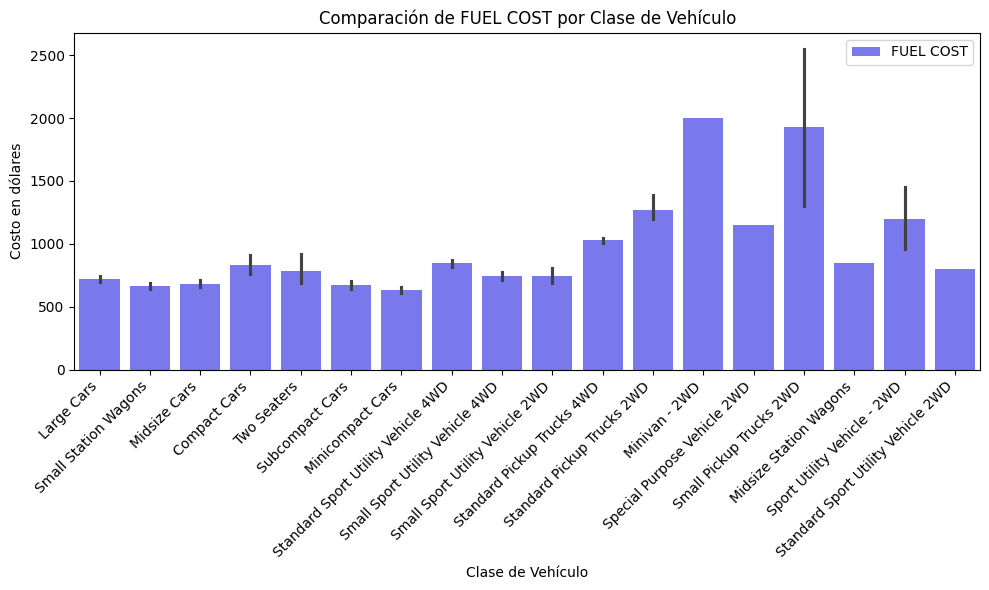

In [24]:
plt.figure(figsize=(10, 6))

sns.barplot(x='VClass', y='fuelCost08', data=sub_dataset7_electricity, color='b', alpha=0.6, label='FUEL COST')
#sns.barplot(x='VClass', y='barrels08', data=sub_dataset7_electricity, color='r', alpha=0.4, label='barrels08')

plt.title('Comparación de FUEL COST por Clase de Vehículo')
plt.xlabel('Clase de Vehículo')
plt.ylabel('Costo en dólares')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si es necesario
plt.legend()  # Mostrar la leyenda

plt.tight_layout()
plt.show()

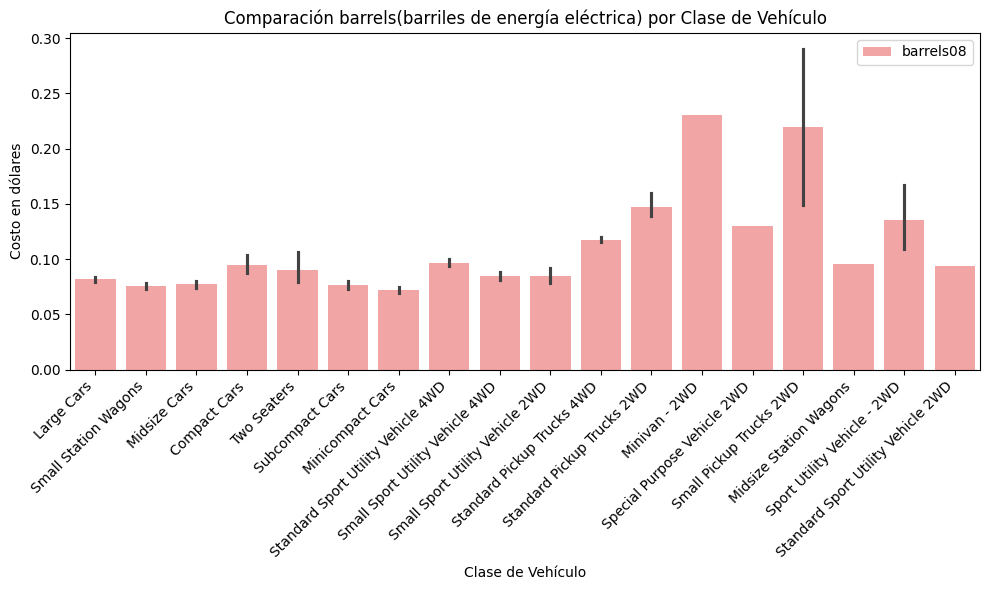

In [25]:
plt.figure(figsize=(10, 6))

sns.barplot(x='VClass', y='barrels08', data=sub_dataset7_electricity, color='r', alpha=0.4, label='barrels08')
plt.title('Comparación barrels(barriles de energía eléctrica) por Clase de Vehículo')
plt.xlabel('Clase de Vehículo')
plt.ylabel('Costo en dólares')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si es necesario
plt.legend()  # Mostrar la leyenda

plt.tight_layout()
plt.show()

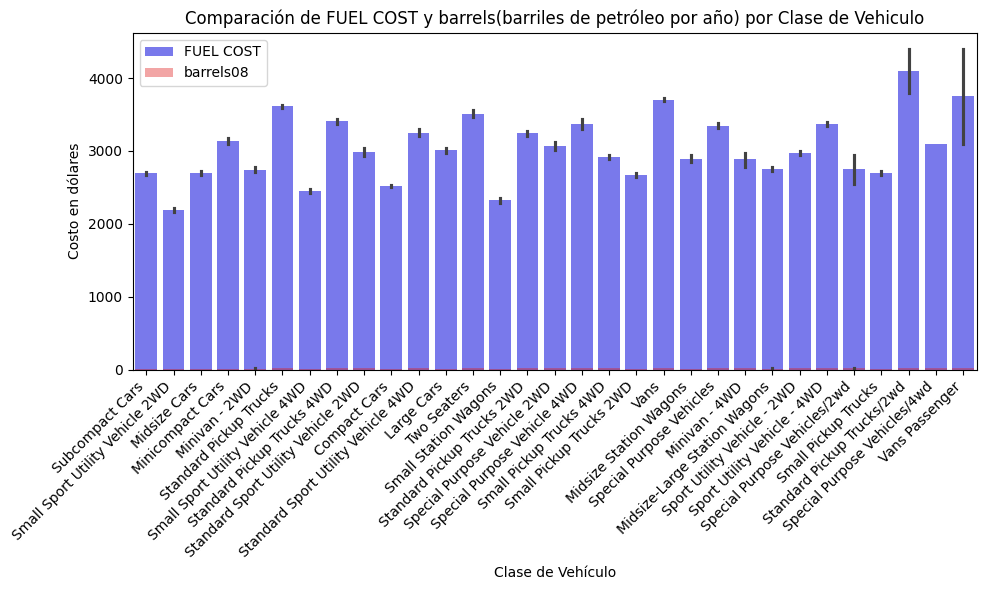

In [22]:
plt.figure(figsize=(10, 6))

sns.barplot(x='VClass', y='fuelCost08', data=Dataset7, color='b', alpha=0.6, label='FUEL COST')
sns.barplot(x='VClass', y='barrels08', data=Dataset7, color='r', alpha=0.4, label='barrels08')

plt.title('Comparación de FUEL COST y barrels( o barriles de petróleo por año) por Clase de Vehiculo')
plt.xlabel('Clase de Vehículo')
plt.ylabel('Costo en dólares')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si es necesario
plt.legend()  # Mostrar la leyenda

plt.tight_layout()
plt.show()

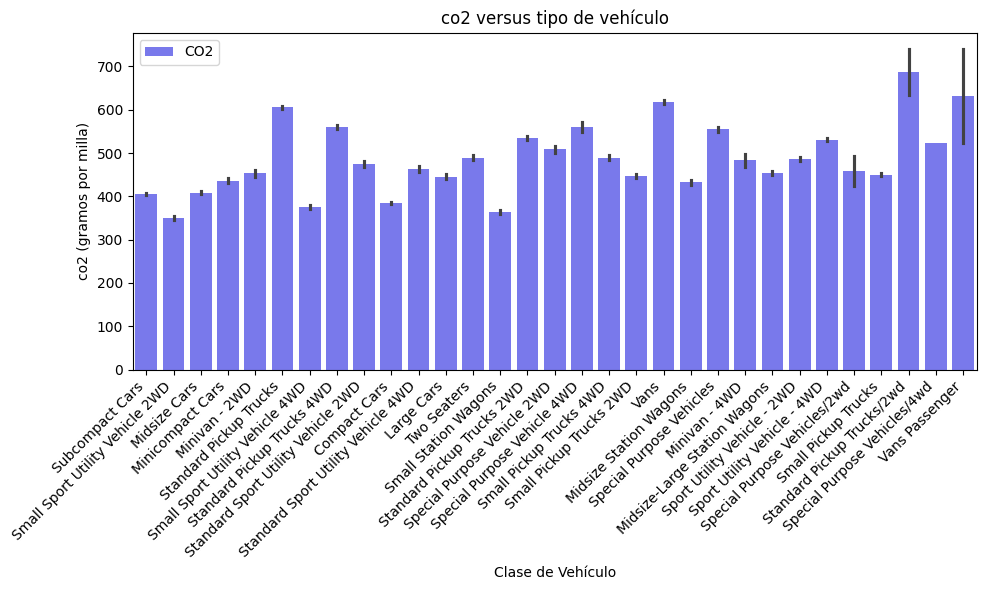

In [32]:
#[["co2TailpipeGpm","VClass"]]
plt.figure(figsize=(10, 6))

sns.barplot(x='VClass', y='co2TailpipeGpm', data=Dataset7, color='b', alpha=0.6, label='CO2')
#sns.barplot(x='VClass', y='barrels08', data=Dataset7, color='r', alpha=0.4, label='barrels08')

plt.title('co2 versus tipo de vehículo')
plt.xlabel('Clase de Vehículo')
plt.ylabel('co2 (gramos por milla)')
plt.xticks(rotation=45, ha='right') 
plt.legend()

plt.tight_layout()
plt.show()

co2: Dióxido de carbono, un gas de efecto invernadero emitido por la quema de combustibles fósiles.

Tailpipe: Se refiere al tubo de escape del vehículo, es decir, las emisiones directas provenientes del motor.

Gpm: Significa gramos por milla (grams per mile), que es la unidad de medida utilizada para expresar la cantidad de CO2 emitida por cada milla que recorre el vehículo.

Podría hacer un gráfico del tipo/cantidad de vehículo VS zona de NY 